
# <span style="color: violet;">Classification Model - Customer churn</span>


 
## <span style="color: violet;">Introduction</span>

#### In the highly competitive world of e-commerce, customer retention is a critical factor for success. E-commerce companies can leverage customer data to predict which customers are at risk of churning, or leaving the service, and take proactive measures to retain them. In this context, classification models can be used to predict whether a customer is likely to churn or not, based on their past behavior and interactions with the service.




## <span style="color: violet;">Data</span>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("clean_data.csv")
data.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,4.0,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,4.0,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,4,50005,1,0.0,Phone,1,12.0,CC,Male,3.0,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
4,6,50007,1,0.0,Phone,3,11.0,Cash on Delivery,Male,2.0,...,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13950 entries, 0 to 13949
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   13950 non-null  int64  
 1   CustomerID                   13950 non-null  int64  
 2   Churn                        13950 non-null  int64  
 3   Tenure                       13950 non-null  float64
 4   PreferredLoginDevice         13950 non-null  object 
 5   CityTier                     13950 non-null  int64  
 6   WarehouseToHome              13950 non-null  float64
 7   PreferredPaymentMode         13950 non-null  object 
 8   Gender                       13950 non-null  object 
 9   HourSpendOnApp               13950 non-null  float64
 10  NumberOfDeviceRegistered     13950 non-null  float64
 11  PreferedOrderCat             13950 non-null  object 
 12  SatisfactionScore            13950 non-null  int64  
 13  MaritalStatus   

In [5]:
import scipy.stats as stat
import pylab
def plot_data(dataframe,feature):
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    dataframe[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(dataframe[feature],dist="norm" ,plot=pylab)
    plt.show()


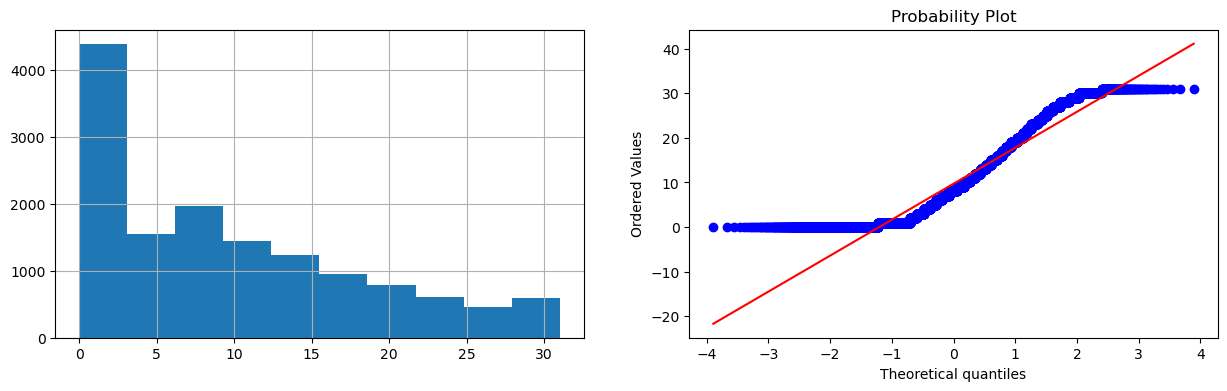

In [6]:
plot_data(data,"Tenure")

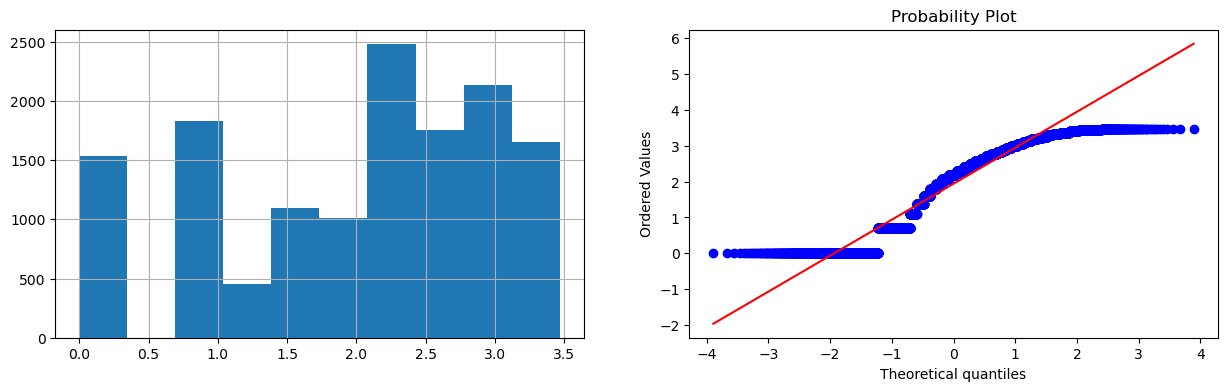

In [7]:
data["Tenure"]=np.log1p(data["Tenure"])
plot_data(data,"Tenure")

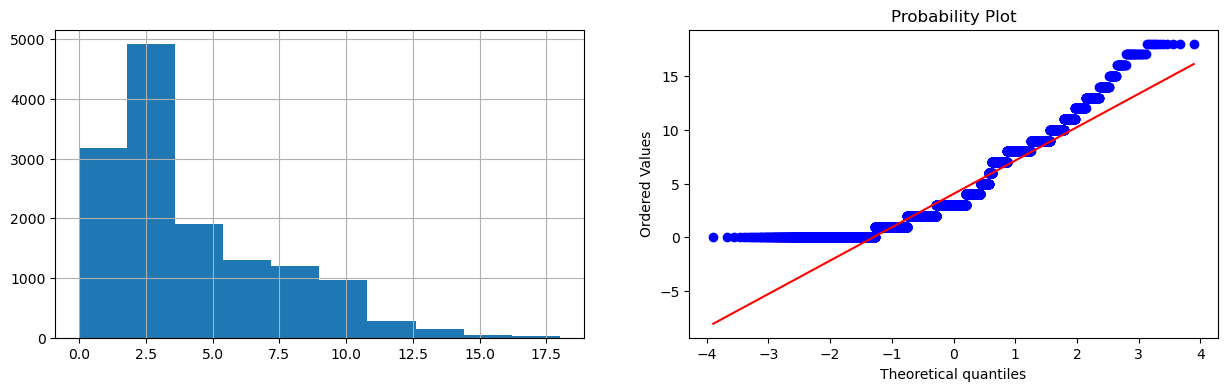

In [8]:
plot_data(data,"DaySinceLastOrder")

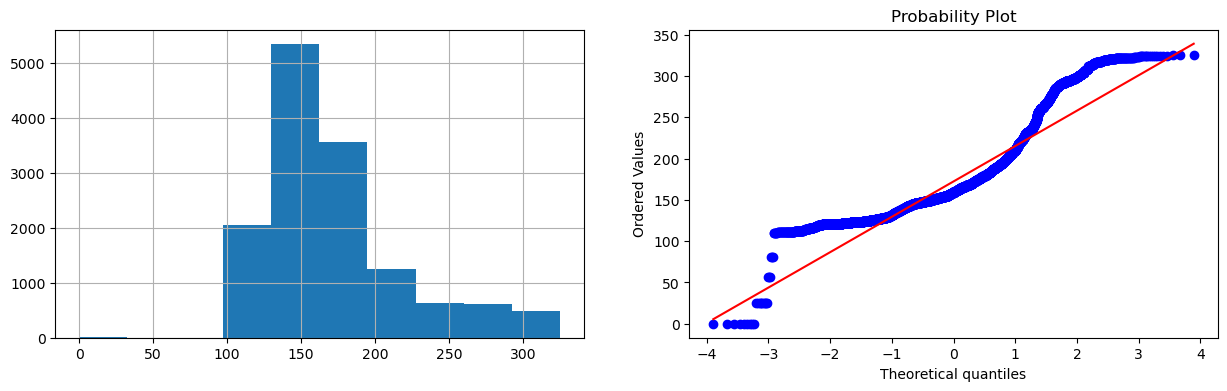

In [9]:
plot_data(data,"CashbackAmount")

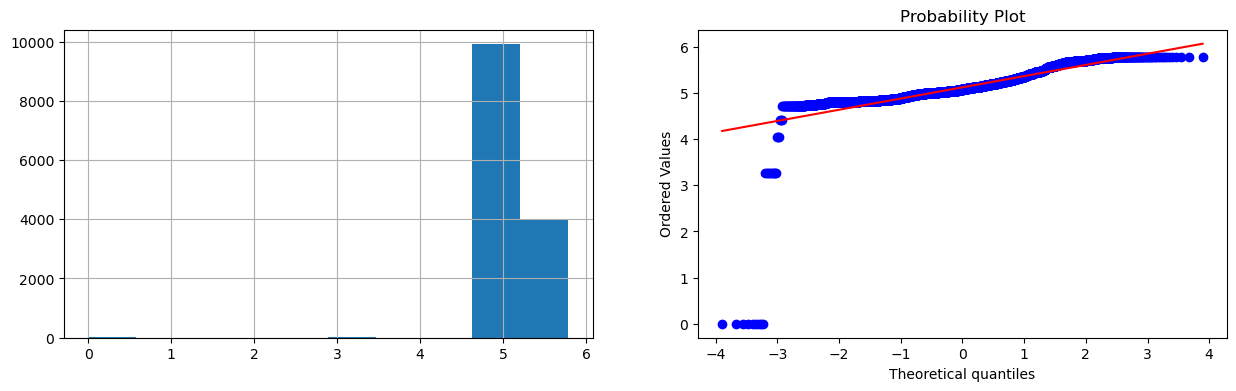

In [10]:
data["CashbackAmount"]=np.log1p(data["CashbackAmount"])
plot_data(data,"CashbackAmount")

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
columns_to_encode = ['PreferredLoginDevice', 'PreferredPaymentMode',"Gender","PreferedOrderCat","MaritalStatus"]
onehot_encoder.fit(data[columns_to_encode])
onehot_encoded = onehot_encoder.transform(data[columns_to_encode])
onehot_data = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names(columns_to_encode))
data= pd.concat([data, onehot_data], axis=1)
data.head(3)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,Gender_m,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,50001,1,1.609438,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,50002,1,1.609438,Phone,1,8.0,UPI,Male,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,50003,1,1.609438,Phone,1,30.0,Debit Card,Male,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
column=data.columns
column

Index(['Unnamed: 0', 'CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_0',
       'PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone',
       'PreferredLoginDevice_Phone', 'PreferredPaymentMode_CC',
       'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'Gender_f', 'Gender_m',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
 

In [13]:
data

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,Gender_m,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,50001,1,1.609438,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,50002,1,1.609438,Phone,1,8.0,UPI,Male,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,50003,1,1.609438,Phone,1,30.0,Debit Card,Male,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,4,50005,1,0.000000,Phone,1,12.0,CC,Male,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,6,50007,1,0.000000,Phone,3,11.0,Cash on Delivery,Male,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13945,16884,55625,0,0.693147,Mobile Phone,3,12.0,Credit Card,Female,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
13946,16885,55626,0,2.397895,Computer,1,30.0,Credit Card,Male,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13947,16886,55627,0,2.639057,Mobile Phone,1,13.0,Credit Card,Male,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13948,16887,55628,0,0.693147,Mobile Phone,1,11.0,Debit Card,Male,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
drop_col=['Unnamed: 0', 'CustomerID','PreferredLoginDevice','PreferredPaymentMode', 'Gender',
             'PreferedOrderCat','MaritalStatus','PreferredLoginDevice_0','PreferredPaymentMode_CC',
             'Gender_Male','PreferedOrderCat_Fashion','MaritalStatus_Married' ]
data.drop(drop_col,axis=1,inplace=True)

In [15]:
data.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Female,Gender_f,Gender_m,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Single
0,1,1.609438,3,6.0,3.0,3.0,2,9,1,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1.609438,1,8.0,3.0,4.0,3,7,1,15.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,1.609438,1,30.0,2.0,4.0,3,6,1,14.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,0.000000,1,12.0,3.0,3.0,5,3,0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,0.000000,3,11.0,2.0,3.0,2,4,0,14.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### <span style="color: violet;">Data Spliting</span>


In [94]:
X = data.drop('Churn', axis = 1).values
y = data["Churn"].values
y=y.reshape(-1,1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [18]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (10462, 32)
Shape of X_test:  (3488, 32)
Shape of y_train:  (10462, 1)
Shape of y_test (3488, 1)


# Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [20]:
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
y_pred_train = gini.predict(X_train)
y_pred_test=gini.predict(X_test)

In [22]:
gini.score(X_train, y_train)

0.874307015866947

In [23]:
gini.score(X_test, y_test)

0.8833142201834863

In [24]:
print('Training set score: {:.4f}'.format(gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gini.score(X_test, y_test)))

Training set score: 0.8743
Test set score: 0.8833


[Text(0.5, 0.875, 'X[0] <= 0.896\ngini = 0.281\nsamples = 10462\nvalue = [8693, 1769]'),
 Text(0.25, 0.625, 'X[7] <= 0.5\ngini = 0.5\nsamples = 2519\nvalue = [1297, 1222]'),
 Text(0.125, 0.375, 'X[6] <= 5.5\ngini = 0.47\nsamples = 1647\nvalue = [1024, 623]'),
 Text(0.0625, 0.125, 'gini = 0.432\nsamples = 1329\nvalue = [909, 420]'),
 Text(0.1875, 0.125, 'gini = 0.462\nsamples = 318\nvalue = [115, 203]'),
 Text(0.375, 0.375, 'X[6] <= 3.5\ngini = 0.43\nsamples = 872\nvalue = [273, 599]'),
 Text(0.3125, 0.125, 'gini = 0.487\nsamples = 618\nvalue = [260, 358]'),
 Text(0.4375, 0.125, 'gini = 0.097\nsamples = 254\nvalue = [13, 241]'),
 Text(0.75, 0.625, 'X[12] <= 4.814\ngini = 0.128\nsamples = 7943\nvalue = [7396, 547]'),
 Text(0.625, 0.375, 'X[7] <= 0.5\ngini = 0.468\nsamples = 303\nvalue = [190, 113]'),
 Text(0.5625, 0.125, 'gini = 0.349\nsamples = 213\nvalue = [165, 48]'),
 Text(0.6875, 0.125, 'gini = 0.401\nsamples = 90\nvalue = [25, 65]'),
 Text(0.875, 0.375, 'X[7] <= 0.5\ngini = 0.107\n

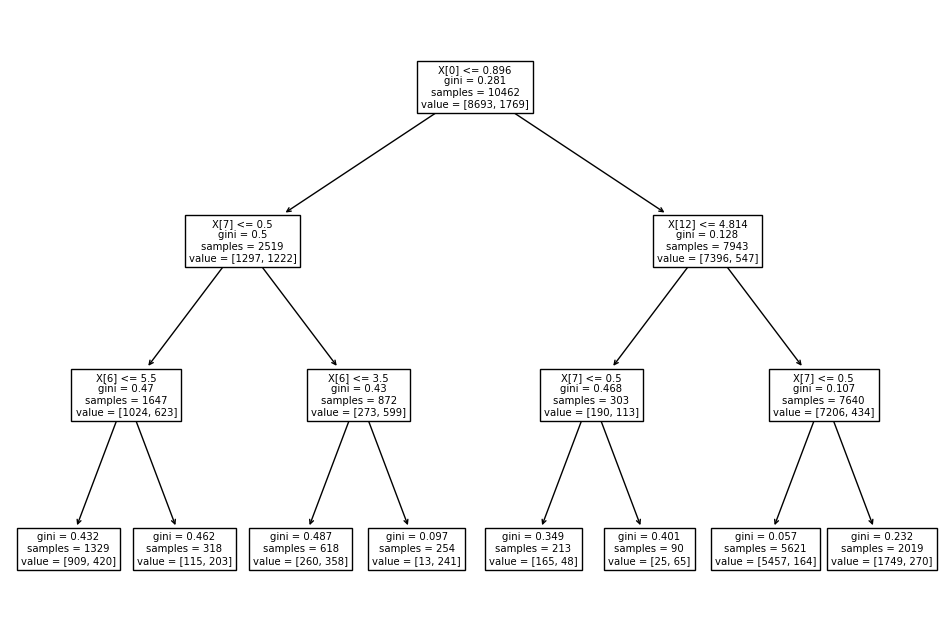

In [25]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(gini.fit(X_train, y_train)) 

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2778  118]
 [ 289  303]]


In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[8280  413]
 [ 902  867]]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2896
           1       0.72      0.51      0.60       592

    accuracy                           0.88      3488
   macro avg       0.81      0.74      0.76      3488
weighted avg       0.87      0.88      0.88      3488



# knn-classification


In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report  


In [30]:
knn_clf = KNeighborsClassifier() 

In [96]:
knn_clf.fit(X_train, y_train)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [33]:
knn_clf.score(X_train, y_train)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.992735614605238

In [34]:
knn_clf.score(X_test, y_test)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9787844036697247

In [35]:
print('Training set score: {:.4f}'.format(knn_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn_clf.score(X_test, y_test)))

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training set score: 0.9927
Test set score: 0.9788


C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [36]:
confusion_matrix(y_test, y_pred_test)

array([[2867,   29],
       [  45,  547]], dtype=int64)

In [37]:
confusion_matrix(y_train, y_pred_train)

array([[8665,   28],
       [  48, 1721]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8693
           1       0.98      0.97      0.98      1769

    accuracy                           0.99     10462
   macro avg       0.99      0.98      0.99     10462
weighted avg       0.99      0.99      0.99     10462



# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_clf = LogisticRegression(solver='liblinear')

In [41]:
lr_clf.fit(X_train, y_train)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [42]:
y_pred_train = lr_clf.predict(X_train)
y_pred_test = lr_clf.predict(X_test)

In [43]:
lr_clf.score(X_train, y_train)

0.8930414834639648

In [44]:
lr_clf.score(X_test, y_test)

0.8881880733944955

In [45]:
print('Training set score: {:.4f}'.format(lr_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lr_clf.score(X_test, y_test)))

Training set score: 0.8930
Test set score: 0.8882


In [46]:
confusion_matrix(y_test, y_pred_test)

array([[2787,  109],
       [ 281,  311]], dtype=int64)

In [47]:
confusion_matrix(y_train, y_pred_train)

array([[8361,  332],
       [ 787,  982]], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      8693
           1       0.75      0.56      0.64      1769

    accuracy                           0.89     10462
   macro avg       0.83      0.76      0.79     10462
weighted avg       0.89      0.89      0.89     10462



# Gaussian Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
naive_bayes = GaussianNB()

In [51]:
naive_bayes.fit(X_train, y_train)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [52]:
y_pred_train = naive_bayes.predict(X_train)
y_pred_test = naive_bayes.predict(X_test)

In [53]:
naive_bayes.score(X_train, y_train)

0.7445995029631046

In [54]:
naive_bayes.score(X_test, y_test)

0.7279243119266054

In [55]:
print('Training set score: {:.4f}'.format(naive_bayes.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(naive_bayes.score(X_test, y_test)))

Training set score: 0.7446
Test set score: 0.7279


In [56]:
confusion_matrix(y_test, y_pred_test)

array([[2090,  806],
       [ 143,  449]], dtype=int64)

In [57]:
confusion_matrix(y_train, y_pred_train)

array([[6442, 2251],
       [ 421, 1348]], dtype=int64)

In [58]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83      8693
           1       0.37      0.76      0.50      1769

    accuracy                           0.74     10462
   macro avg       0.66      0.75      0.67     10462
weighted avg       0.84      0.74      0.77     10462



# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random_forest = RandomForestClassifier(random_state=0)

In [61]:
random_forest.fit(X_train, y_train)

C:\Users\Vaidees\AppData\Local\Temp\ipykernel_13532\2566748861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [62]:
y_pred_train = random_forest.predict(X_train)
y_pred_test = random_forest.predict(X_test)

In [63]:
random_forest.score(X_train, y_train)

1.0

In [64]:
random_forest.score(X_test, y_test)

0.9991399082568807

In [65]:
print('Training set score: {:.4f}'.format(random_forest.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(random_forest.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9991


In [66]:
confusion_matrix(y_train, y_pred_train)

array([[8693,    0],
       [   0, 1769]], dtype=int64)

In [67]:
confusion_matrix(y_test, y_pred_test)

array([[2896,    0],
       [   3,  589]], dtype=int64)

In [68]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8693
           1       1.00      1.00      1.00      1769

    accuracy                           1.00     10462
   macro avg       1.00      1.00      1.00     10462
weighted avg       1.00      1.00      1.00     10462



# Support Vector Machine (SVM)

In [69]:
from sklearn.svm import SVC

In [70]:
support_vector = SVC()

In [71]:
support_vector.fit(X_train, y_train)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [72]:
y_pred_train_svm = support_vector.predict(X_train)
y_pred_test_svm = support_vector.predict(X_test)

In [73]:
support_vector.score(X_train, y_train)

0.8921812272987957

In [74]:
support_vector.score(X_test, y_test)

0.8847477064220184

In [75]:
print('Training set score: {:.4f}'.format(support_vector.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(support_vector.score(X_test, y_test)))

Training set score: 0.8922
Test set score: 0.8847


In [76]:
confusion_matrix(y_train, y_pred_train_svm)

array([[8557,  136],
       [ 992,  777]], dtype=int64)

In [77]:
confusion_matrix(y_test, y_pred_test_svm)

array([[2843,   53],
       [ 349,  243]], dtype=int64)

In [78]:
print(classification_report(y_train, y_pred_train_svm))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8693
           1       0.85      0.44      0.58      1769

    accuracy                           0.89     10462
   macro avg       0.87      0.71      0.76     10462
weighted avg       0.89      0.89      0.88     10462



# Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=42)


In [81]:
gbm.fit(X_train, y_train)

C:\Users\Vaidees\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.3, random_state=42)

In [82]:
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

In [83]:
gbm.score(X_train, y_train)

0.9700822022557828

In [84]:
gbm.score(X_test, y_test)

0.9572821100917431

In [85]:
print('Training set score: {:.4f}'.format(gbm.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gbm.score(X_test, y_test)))

Training set score: 0.9701
Test set score: 0.9573


# AdaBoost

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
base_estimator = DecisionTreeClassifier(max_depth=1)
n_estimators = 1000  
learning_rate = 0.3  
algorithm = 'SAMME'  
random_state = 42

In [88]:
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=n_estimators, learning_rate=learning_rate, algorithm=algorithm, random_state=random_state)


In [89]:
ada.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.3, n_estimators=1000, random_state=42)

In [90]:
y_pred_train_ = ada.predict(X_train)
y_pred_test_gbm = ada.predict(X_test)

In [91]:
ada.score(X_test, y_test)

0.8922018348623854

In [92]:
ada.score(X_test, y_test)

0.8922018348623854

In [93]:
print('Training set score: {:.4f}'.format(ada.score(X_test, y_test)))

print('Test set score: {:.4f}'.format(ada.score(X_test, y_test)))

Training set score: 0.8922
Test set score: 0.8922


### Results and conclusions

1.The Random Forest Regression model has a high level of accuracy,
        training set score of 1.0000 
        test set score of 0.9991.

2.The percentage of churn rate is higher among customers who have lodged a complaint compared to those who have not.

3.Single individuals have a higher churn rate compared to other marital status categories.